
<br>
    The objective of this exercise is that you analyse the code provided and<br>
    make the link with the curse. You have to provide a short report that<br>
    comments and analyse the results. You can use directly the results or adapt<br>
    them to you needs.<br>


import the numerical library

In [51]:
import numpy as np
# import signal processing library
import scipy.signal as sp
# import ploting library
import pylab as py
py.ion()
py.close('all')

load the ecg signal

In [52]:
x = np.genfromtxt('ecg.dat')
# sampling frequency of the signal is 500 Hz
fs = 500
# generate correponding time vector
t = np.arange(len(x))/fs


 <br>
    The signal is an ECG signal with visible PQRST complex.  If you zoom on the<br>
    signal plot you can see that there is a 50Hz perturbation due to the power network.<br>
    The objective is to remove this component without altering the PQRST complex.<br>
    Several filtering techniques are used. Comment the advantages and<br>
    disadvantages.<br>



 <br>
    Plot time signal and FFT.<br>
    Q: Comment the figures.<br>
    <span style="color:blue">By observing the plots we can see the
 power line interference at 50 Hz. From the FFT a peak at 50 Hz is clearly visible. Different
 f
 iltering techniques can be used to remove this type of interference. For example an IIR notch filter
 would be good option.


Compute the FFT of the signal

In [53]:
x_fft = np.fft.fft(x)
# Determine the frequency scale
f_fft = np.arange(len(x_fft))/len(x_fft)*fs

plot the signal

(0.0, 70.0)

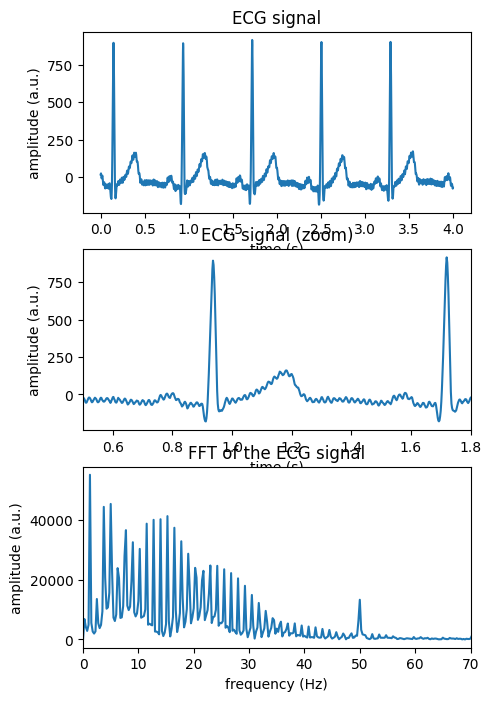

In [54]:
py.figure(1, figsize=[5,8])
py.clf()
py.subplot(3,1,1)
py.plot(t, x)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.subplot(3,1,2)
py.plot(t, x)
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal (zoom)')
py.xlim(0.5, 1.8), 
py.subplot(3,1,3)
py.plot(f_fft, abs(x_fft))
py.xlabel('frequency (Hz)')
py.ylabel('amplitude (a.u.)')
py.title('FFT of the ECG signal')
py.xlim(0,70)

<br>
IIR filter:<br>
Define a filter with a pass-band up to 35 Hz and a stop band from 50Hz.<br>
Maximum attenuation in passband 3 dB<br>
Minimum attenuation in stopband 40 dB<br>

Q: Comment the results (distorsion of the PQRST, delay, ...)<br>
<span style="color:blue">We observe the PQRST complex shifted and slightly distorted. The time-shift of the signal is due to the delay introduced by the causal filter. The distortion is mainly due to 2 effects: 1. While Butterworth filters guarantee maximally flat passband, the transition band is gradual, hence frequencies near the cutoff are attenuated. 2. Because the filter has a nonlinear phase, different frequency components are shifted in time differently. This means the sharp morphology of the ECG does not reconstruct perfectly after filtering.</span><br>

Q: Based on the FFT spectrum comment the selection of the pass and stop band frequencies.<br>
<span style="color:blue">From the FFT of the ECG signal, it can be seen that most of the useful energy is concentrated below 35–40 Hz. The P and T waves occupy the lower frequencies (≈10 Hz), while the QRS complex, which represents the fastest part of the signal, contains energy mainly between 10 and 40 Hz, with significant contributions around 15–30 Hz and residual components up to about 40 Hz. The distinct peak at 50 Hz does not belong to the cardiac signal: it is clearly power line interference. The choice of a pass-band up to 35 Hz is therefore consistent: it preserves most of the physiological information (P, QRS, T) while reducing high-frequency noise. Defining the stop-band at 50 Hz with at least 40 dB attenuation is aimed at suppressing the power line disturbance visible in the spectrum. The transition between 35 and 50 Hz is fairly wide (15 Hz), so it can be implemented without excessively high filter orders, even with an IIR. However, in this region there are still components of the QRS complex: a cutoff at 35 Hz may slightly attenuate its steepest slopes.</span>


Analogic limit of the passband frequency

In [55]:
f_pass = 35
# Analogic limit of the stopband frequency
f_stop = 50
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn)
# Filter the signal
x_f = sp.lfilter(b ,a, x)

(0.5, 1.8)

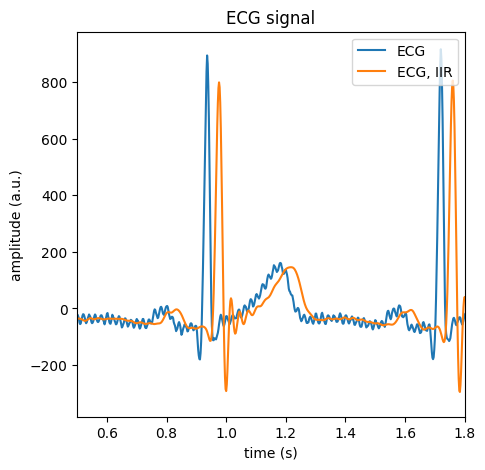

In [56]:
py.figure(2, figsize=[5,5])
py.clf()
py.plot(t ,x, label='ECG')
py.plot(t, x_f, label='ECG, IIR')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.legend(loc='upper right')
py.xlim(0.5, 1.8)


 <br>
    IIR filter (zero phase):<br>
    Use the same filter but apply a zero phase approach.<br>
    Q: Comment the results (distorsion of the PQRST, delay, ...)<br>
    <span style="color:blue">By using a zero-phase filtering approach the group
 delay is removed, hence obtaining a signal that is no more shifted This approach is only feasible
 for asynchronous filtering


Filter the signal

In [57]:
x_f = sp.filtfilt(b ,a, x)

(0.5, 1.8)

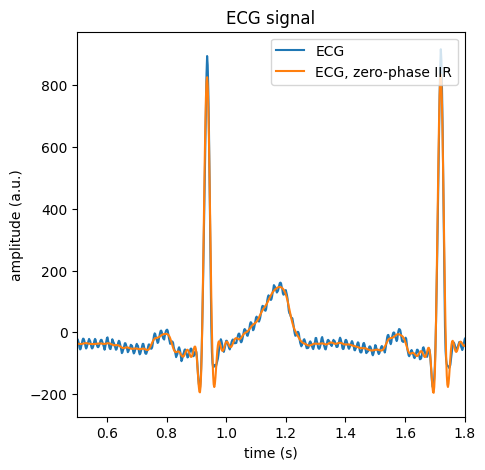

In [58]:
py.figure(3, figsize=[5,5])
py.clf()
py.plot(t ,x, label='ECG')
py.plot(t, x_f, label='ECG, zero-phase IIR')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.legend(loc='upper right')
py.xlim(0.5, 1.8)


<br>
    Linear phase FIR filter.<br>
    Define a FIR filter with the same properties.<br>
    Q: Comment the results (distorsion of the PQRST, delay, ...).<br>
    <span style="color:blue"> Linear phase filters maintain the true morphology of the
 ECG by introducing only a constant time delay, without distorting the relative timing of different
 frequency components. This is why the PQRST complex looks “cleaner” and less distorted, even
 though the entire waveform is shifted in time.


length of the filter

In [59]:
l_fir = 101
# compute the filter coefficients using least square approach
b = sp.firls(l_fir, [0, f_pass_N, f_stop_N, 1], [1, 1, 1/100, 1/100])
a = [1]
# filter the signal
x_f = sp.lfilter(b, a, x)

(0.5, 1.8)

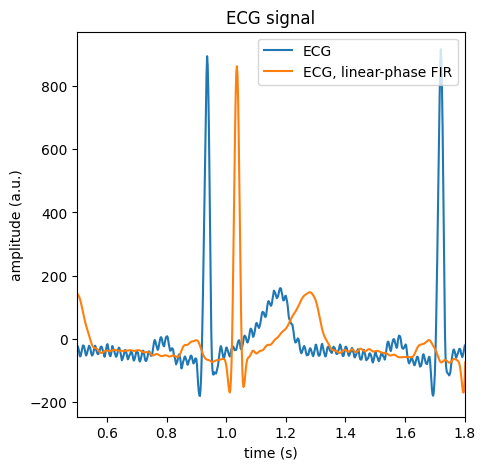

In [60]:
py.figure(4, figsize=[5,5])
py.clf()
py.plot(t ,x, label='ECG')
py.plot(t, x_f, label='ECG, linear-phase FIR')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG signal')
py.legend(loc='upper right')
py.xlim(0.5, 1.8)